In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [3]:
# Step 1: Load and Clean Data
df = pd.read_csv('./sales_data_sample.csv', encoding='unicode_escape')
df['ORDERDATE'] = pd.to_datetime(df['ORDERDATE'])  # Convert ORDERDATE to datetime

In [4]:
# Step 2: Create RFM Table
# Snapshot date is one day after the last order date
snapshot_date = df['ORDERDATE'].max() + pd.Timedelta(days=1)

In [5]:
# Calculate RFM values
rfm_df = df.groupby('CUSTOMERNAME').agg({
    'ORDERDATE': lambda x: (snapshot_date - x.max()).days,  # Recency
    'ORDERNUMBER': 'count',  # Frequency
    'SALES': 'sum'  # Monetary
}).rename(columns={'ORDERDATE': 'Recency', 'ORDERNUMBER': 'Frequency', 'SALES': 'MonetaryValue'})

In [6]:
# Step 3: Transform and Scale RFM Data
rfm_df_log = np.log1p(rfm_df)  # Log transform to normalize data
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm_df_log)  # Standardize data

In [7]:
# Step 4: Determine Optimal Clusters with Elbow Method
sse = []
for k in range(1, 11):  # Range for number of clusters
    kmeans = KMeans(n_clusters=k, random_state=1)
    kmeans.fit(rfm_scaled)
    sse.append(kmeans.inertia_)  # Sum of squared distances

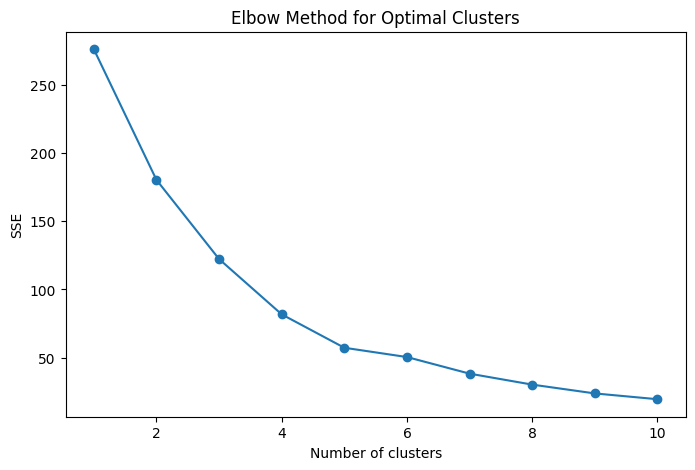

In [8]:
# Plot the Elbow curve
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), sse, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.title('Elbow Method for Optimal Clusters')
plt.show()

In [9]:
# Step 5: Apply KMeans with chosen cluster number (e.g., 5 from Elbow Method)
kmeans = KMeans(n_clusters=5, random_state=1)
rfm_df['Cluster'] = kmeans.fit_predict(rfm_scaled)  # Assign clusters to customers

In [10]:
# Display sample of clustered data
print(rfm_df.head())

                         Recency  Frequency  MonetaryValue  Cluster
CUSTOMERNAME                                                       
AV Stores, Co.               196         51      157807.81        4
Alpha Cognac                  65         20       70488.44        2
Amica Models & Co.           265         26       94117.26        2
Anna's Decorations, Ltd       84         46      153996.13        4
Atelier graphique            188          7       24179.96        1
